# Non-Polar Stereographic projections
While most of the functionality of PolarToolkit is focused on the Arctic or Antarctic regions, with the corresponding Polar Stereographic projections (EPSG:3413 and EPSG:3031 respectively), there is also some support for plotting projected (in meters not lat/lon) data in other EPSG projections. This works for plotting coastlines, simple basemaps, scalebars, and north arrows.

In [1]:
%load_ext autoreload
%autoreload 2

import pygmt

import polartoolkit as ptk

In [2]:
# define a projected region in meters
# values are relative to the origin in the format (west, east, south, north)
region = (0, 3000e3, -2000e3, 2000e3)
# region = (0, 1500e3, -1000e3, 1000e3)

# choose several EPSG codes
epsgs = [
    "10598",  # For N. America
    "10596", # For Europe
    "10594", # For Asia
    "3857", # Web Mercator, global but distorted at poles
]

grids = []
for epsg in epsgs:
    # convert each region from meters into to lat/lon
    region_ll = ptk.region_xy_to_ll(
        region,
        epsg=epsg,
    )

    # load 2m resolution earth relief data for this region, relative to the Geoid
    grid = pygmt.datasets.load_earth_relief(
        resolution="02m",
        region=region_ll,
    )

    # tell rioxarray what the current projection is (geographic)
    grid = grid.rio.write_crs("EPSG:4326")

    # reproject to xy
    grid = grid.rio.reproject(f"EPSG:{epsg}", resolution=2e3)

    # cut back to original region
    grid = ptk.resample_grid(grid, region=region)
    grids.append(grid)

grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


grdinfo [WARNING]: Column selected for latitude-formatting has values that exceed +/- 90; set to NaN


/home/mdtanker/polartoolkit/src/polartoolkit/maps.py:157: UserWarning: EPSG:3857 (Web Mercator) is not recommended, especially for high latitudes as it can cause significant distortion. Consider using a different projection.
  self.proj, self.proj_latlon, self.width, self.height = utils.set_proj(


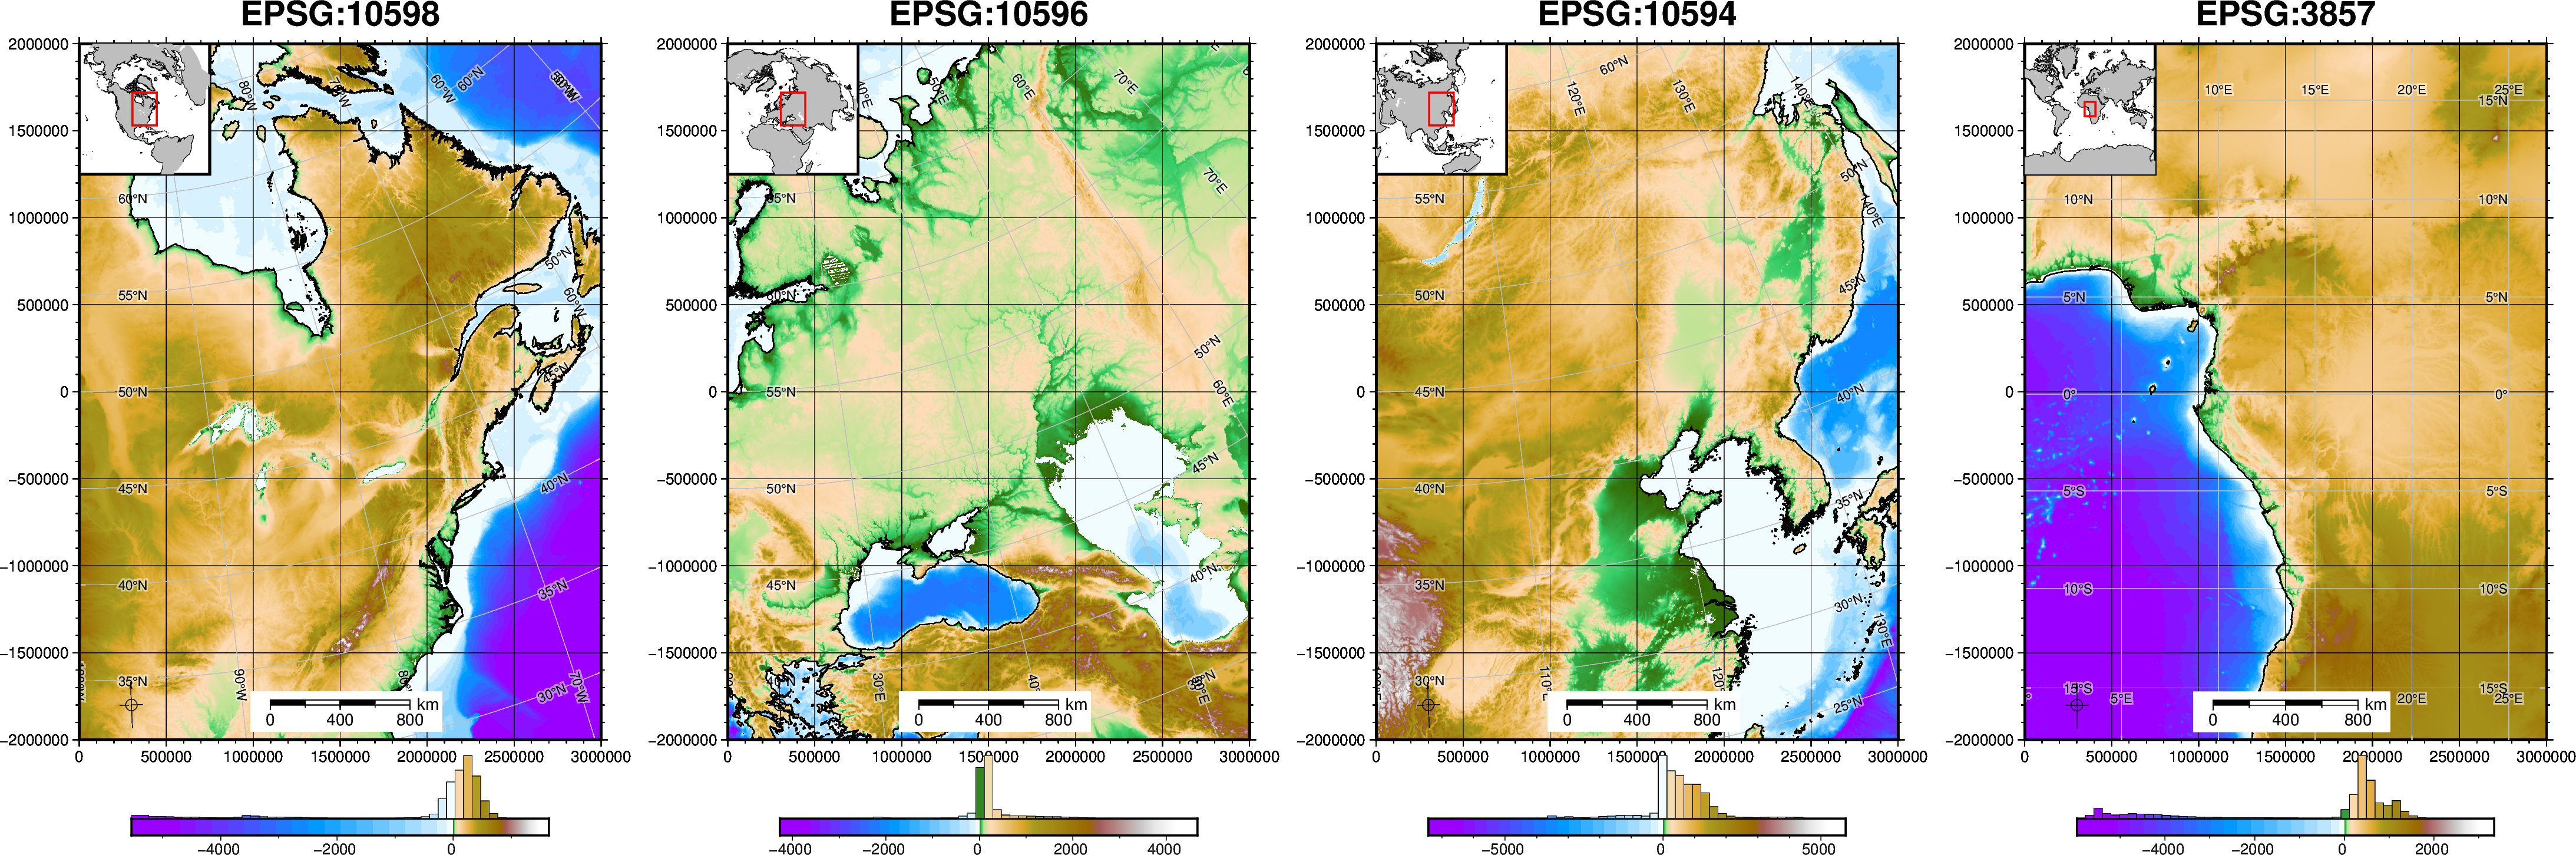

In [3]:
for i, g in enumerate(grids):
    if i == 0:
        fig = None
        origin_shift = None
    else:
        origin_shift = "x"

    fig = ptk.plot_grid(
        g,
        fig=fig,
        origin_shift=origin_shift,
        xshift_amount=1.2,
        title=f"EPSG:{epsgs[i]}",
        epsg=epsgs[i],
        cmap="globe",
        region=region,
        frame=["neSW", "xafg", "yafg"],
        coast=True,
        scalebar=True,
        north_arrow=True,
        gridlines=True,
        hist=True,
        inset=True,
        inset_box="+gwhite+p1.5p,black",
    )

fig.show(dpi=200)